# Amazon Q&A Dataset - Exploratory Data Analysis
## Home and Kitchen Category

**Dataset Source:** Julian McAuley, UCSD  
**Category:** Home and Kitchen (184,439 questions)

---


## 1. Setup and Data Loading


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

In [4]:
# Using the provided parse() and getDF() functions from the dataset documentation

def parse(path):
    """Parse gzipped JSON file line by line."""
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    """Load data into pandas DataFrame."""
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

print("Data loading functions defined.")


Data loading functions defined.


In [ ]:
# Load Home and Kitchen data
DATA_PATH = '../data/raw/qa_Home_and_Kitchen.json.gz'

print(f"Loading data from: {DATA_PATH}")
print("This may take a moment...")

df = getDF(DATA_PATH)
print(f"Total records: {len(df):,}")


Loading data from: data/qa_Home_and_Kitchen.json.gz
This may take a moment...

✓ Data loaded successfully!
Total records: 184,439


---
## 2. Basic Data Overview


In [6]:
# Display basic info
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET OVERVIEW

Shape: 184,439 rows × 7 columns

Columns: ['questionType', 'asin', 'answerTime', 'unixTime', 'question', 'answer', 'answerType']

Memory Usage: 104.24 MB


In [8]:
# Data types
print("\nData Types:")
print("-" * 40)
print(df.dtypes)



Data Types:
----------------------------------------
questionType     object
asin             object
answerTime       object
unixTime        float64
question         object
answer           object
answerType       object
dtype: object


In [9]:
# First few records
print("\nFirst 5 Records:")
df.head()



First 5 Records:


,questionType,asin,answerTime,unixTime,question,answer,answerType
0,open-ended,1567120709,"Aug 5, 2014",1.407222e+09,"If I can't change the battery myself, where wo...",Go to anyone that changes watch batteries. CVS...,NaN
1,yes/no,1567120709,"Aug 4, 2014",1.407136e+09,Will this spell corrector give options of poss...,yes a small list of possiblities,Y
2,open-ended,1567120709,"Oct 18, 2013",1.382080e+09,What does the Fanklin Spelling corrector opera...,"Yes, comes with a battery already installed.",NaN
3,yes/no,1567120709,"Feb 27, 2014",1.393488e+09,Will it correct my spelling on Face Book?,The franklin speller only corrects the word th...,?
4,yes/no,1567120709,"Jan 16, 2015",1.421395e+09,"Will it help a senior citizen who can't speak,...",no cuz it will stop working after the first we...,?


In [10]:
# Sample record examination
print("\nSample Record (Detailed View):")
print("=" * 60)
sample = df.iloc[0]
for col, val in sample.items():
    print(f"{col:15}: {val}")



Sample Record (Detailed View):
questionType   : open-ended
asin           : 1567120709
answerTime     : Aug 5, 2014
unixTime       : 1407222000.0
question       : If I can't change the battery myself, where would I get it changed?
answer         : Go to anyone that changes watch batteries. CVS , Riteaid or Radio Shack!
answerType     : nan


In [11]:
# Missing values analysis
print("\nMissing Values Analysis:")
print("-" * 40)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
print(missing_df)



Missing Values Analysis:
----------------------------------------
              Missing Count  Missing %
questionType              0       0.00
asin                      0       0.00
answerTime                0       0.00
unixTime               5352       2.90
question                  0       0.00
answer                    0       0.00
answerType           108113      58.62


In [12]:
# Check for duplicate records
print("\nDuplicate Analysis:")
print("-" * 40)
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,}")
print(f"Duplicate percentage: {duplicates/len(df)*100:.2f}%")



Duplicate Analysis:
----------------------------------------
Total duplicate rows: 42
Duplicate percentage: 0.02%


---
## 3. Question Type Distribution Analysis


In [13]:
# Question Type Distribution
print("\nQUESTION TYPE DISTRIBUTION")
print("=" * 60)

question_type_counts = df['questionType'].value_counts()
question_type_pct = df['questionType'].value_counts(normalize=True) * 100

qt_summary = pd.DataFrame({
    'Count': question_type_counts,
    'Percentage': question_type_pct.round(2)
})
print(qt_summary)
print(f"\nTotal: {question_type_counts.sum():,}")



QUESTION TYPE DISTRIBUTION
               Count  Percentage
questionType                    
open-ended    108113       58.62
yes/no         76326       41.38

Total: 184,439


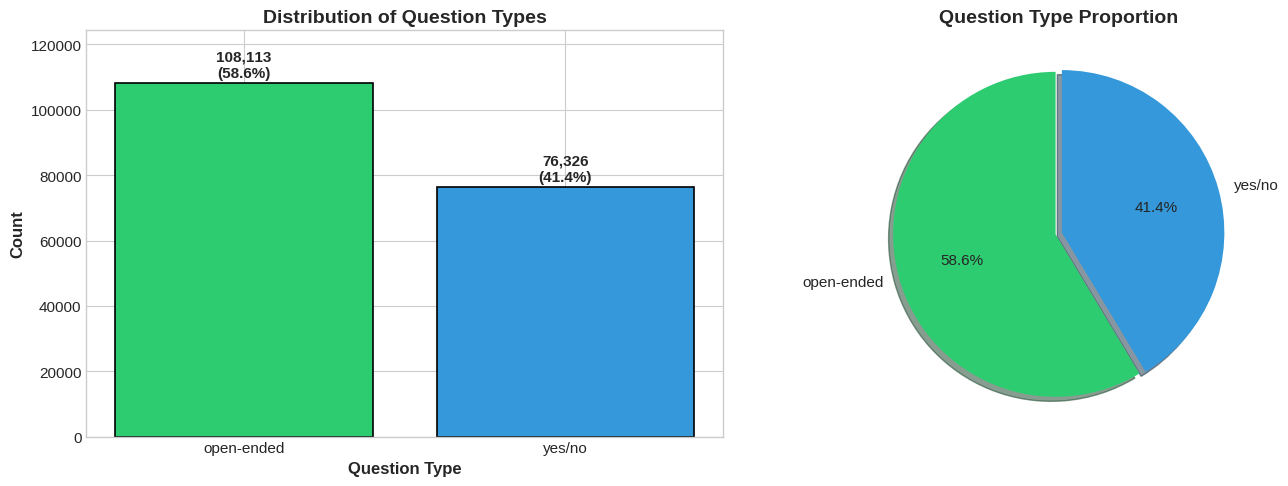

In [14]:
# Visualize Question Type Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar Chart
colors = ['#2ecc71', '#3498db']
ax1 = axes[0]
bars = ax1.bar(question_type_counts.index, question_type_counts.values, color=colors, edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Question Type', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Question Types', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, count, pct in zip(bars, question_type_counts.values, question_type_pct.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
             f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.set_ylim(0, max(question_type_counts.values) * 1.15)

# Pie Chart
ax2 = axes[1]
explode = (0.02, 0.02)
wedges, texts, autotexts = ax2.pie(question_type_counts.values, 
                                    labels=question_type_counts.index,
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    explode=explode,
                                    shadow=True,
                                    startangle=90)
ax2.set_title('Question Type Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/eda/question_type_distribution.png', dpi=150, bbox_inches='tight')
, dpi=150, bbox_inches='tight')
plt.show()


In [15]:
# Answer Type Distribution (for yes/no questions)
print("\nANSWER TYPE DISTRIBUTION (Yes/No Questions Only)")
print("=" * 60)

# Filter yes/no questions
yes_no_df = df[df['questionType'] == 'yes/no'].copy()
print(f"Total yes/no questions: {len(yes_no_df):,}")

if 'answerType' in yes_no_df.columns:
    answer_type_counts = yes_no_df['answerType'].value_counts()
    answer_type_pct = yes_no_df['answerType'].value_counts(normalize=True) * 100
    
    at_summary = pd.DataFrame({
        'Count': answer_type_counts,
        'Percentage': answer_type_pct.round(2)
    })
    print("\nAnswer Type Distribution:")
    print(at_summary)



ANSWER TYPE DISTRIBUTION (Yes/No Questions Only)
Total yes/no questions: 76,326

Answer Type Distribution:
            Count  Percentage
answerType                   
?           39394       51.61
Y           24729       32.40
N           12203       15.99


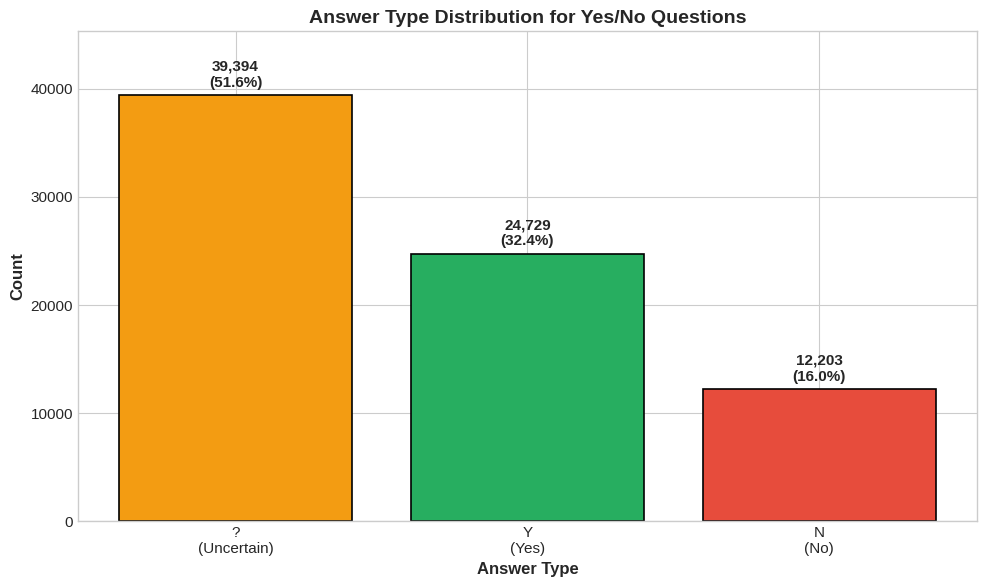

In [16]:
# Visualize Answer Type Distribution
if 'answerType' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    colors_at = {'Y': '#27ae60', 'N': '#e74c3c', '?': '#f39c12'}
    bar_colors = [colors_at.get(x, '#95a5a6') for x in answer_type_counts.index]
    
    bars = ax.bar(answer_type_counts.index, answer_type_counts.values, color=bar_colors, edgecolor='black', linewidth=1.2)
    
    ax.set_xlabel('Answer Type', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.set_title('Answer Type Distribution for Yes/No Questions', fontsize=14, fontweight='bold')
    
    # Add labels
    labels = {'Y': 'Yes', 'N': 'No', '?': 'Uncertain'}
    ax.set_xticklabels([f"{x}\n({labels.get(x, x)})" for x in answer_type_counts.index])
    
    for bar, count, pct in zip(bars, answer_type_counts.values, answer_type_pct.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, 
                f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    ax.set_ylim(0, max(answer_type_counts.values) * 1.15)
    plt.tight_layout()
    plt.savefig('../visualizations/eda/answer_type_distribution.png', dpi=150, bbox_inches='tight')
, dpi=150, bbox_inches='tight')
    plt.show()


---
## 4. Product (ASIN) Distribution Analysis


In [17]:
# Products per ASIN Analysis
print("\nPRODUCT (ASIN) DISTRIBUTION ANALYSIS")
print("=" * 60)

# Questions per ASIN
questions_per_asin = df['asin'].value_counts()

print(f"\nTotal unique products (ASINs): {df['asin'].nunique():,}")
print(f"Total questions: {len(df):,}")
print(f"Average questions per product: {len(df) / df['asin'].nunique():.2f}")



PRODUCT (ASIN) DISTRIBUTION ANALYSIS

Total unique products (ASINs): 24,501
Total questions: 184,439
Average questions per product: 7.53


In [18]:
# Statistical summary of questions per product
print("\nQuestions per Product - Statistical Summary:")
print("-" * 50)
stats = questions_per_asin.describe()
print(f"Mean:     {stats['mean']:.2f}")
print(f"Std Dev:  {stats['std']:.2f}")
print(f"Min:      {stats['min']:.0f}")
print(f"25%:      {stats['25%']:.0f}")
print(f"Median:   {stats['50%']:.0f}")
print(f"75%:      {stats['75%']:.0f}")
print(f"Max:      {stats['max']:.0f}")



Questions per Product - Statistical Summary:
--------------------------------------------------
Mean:     7.53
Std Dev:  2.63
Min:      1
25%:      5
Median:   8
75%:      10
Max:      20


In [19]:
# Products by question count ranges
print("\nProducts by Question Count Ranges:")
print("-" * 50)

ranges = [
    (1, 1, '1 question'),
    (2, 5, '2-5 questions'),
    (6, 10, '6-10 questions'),
    (11, 20, '11-20 questions'),
    (21, 50, '21-50 questions'),
    (51, 100, '51-100 questions'),
    (101, float('inf'), '100+ questions')
]

range_counts = []
for low, high, label in ranges:
    count = ((questions_per_asin >= low) & (questions_per_asin <= high)).sum()
    pct = count / len(questions_per_asin) * 100
    range_counts.append({'Range': label, 'Products': count, 'Percentage': f'{pct:.2f}%'})
    print(f"{label:20}: {count:>6,} products ({pct:>5.2f}%)")

range_df = pd.DataFrame(range_counts)



Products by Question Count Ranges:
--------------------------------------------------
1 question          :     31 products ( 0.13%)
2-5 questions       :  7,111 products (29.02%)
6-10 questions      : 17,358 products (70.85%)
11-20 questions     :      1 products ( 0.00%)
21-50 questions     :      0 products ( 0.00%)
51-100 questions    :      0 products ( 0.00%)
100+ questions      :      0 products ( 0.00%)


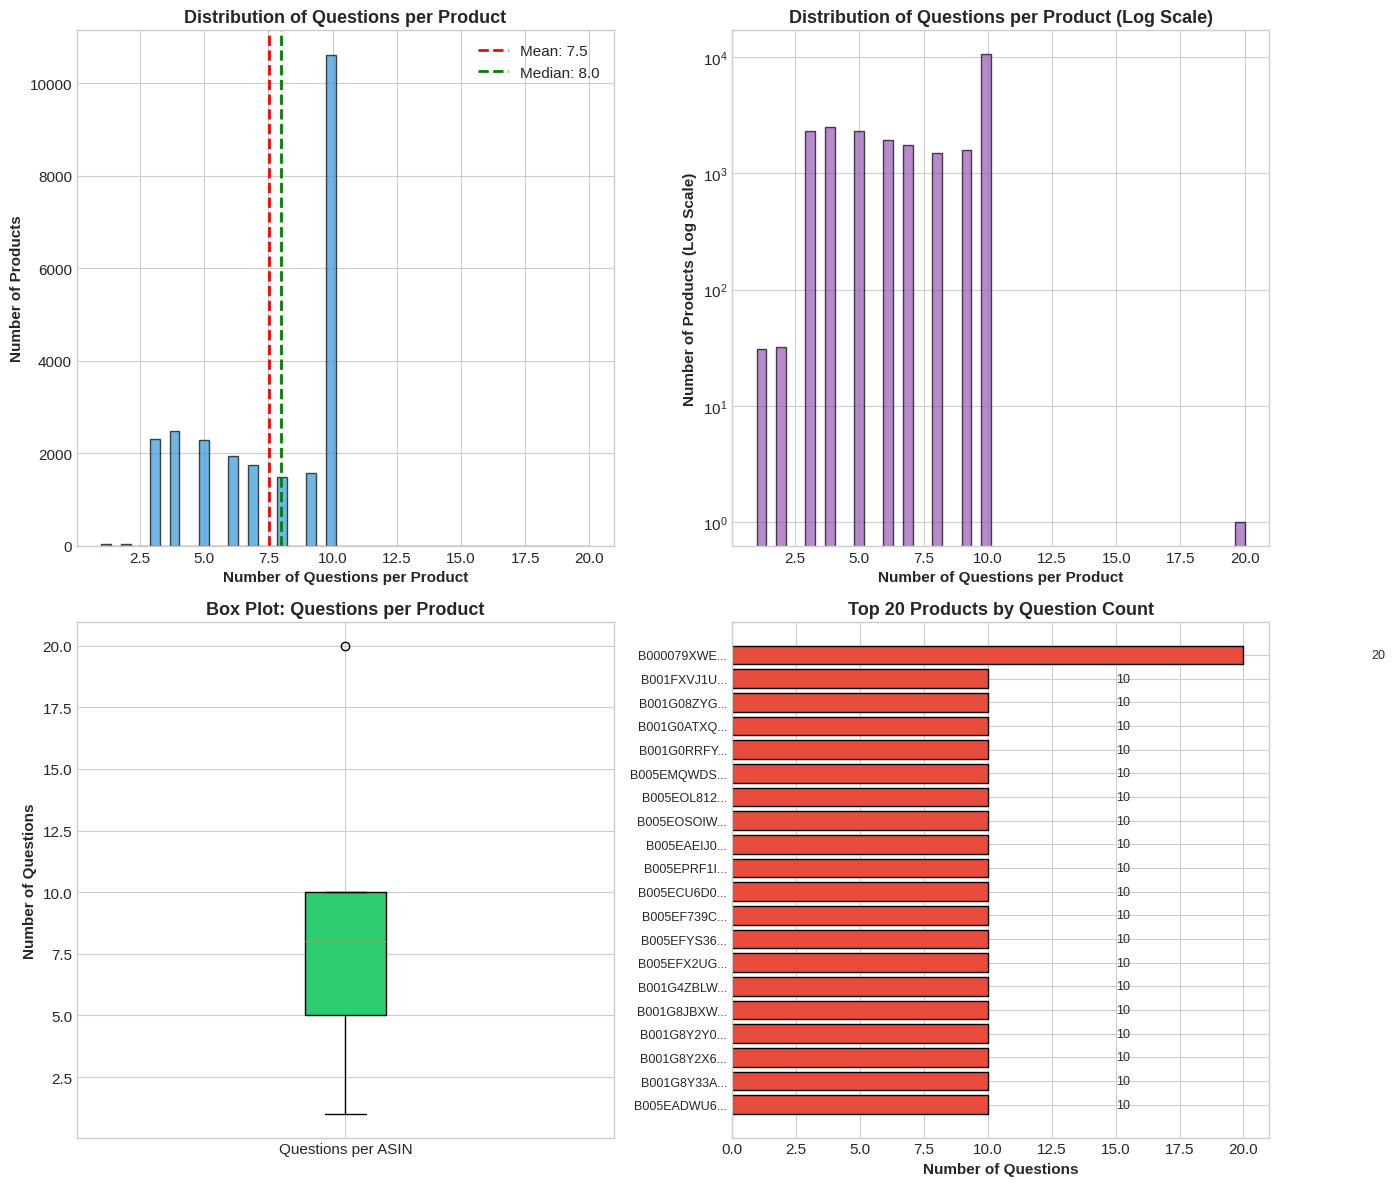

In [20]:
# Distribution visualization - Histogram
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histogram of questions per product
ax1 = axes[0, 0]
ax1.hist(questions_per_asin.values, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Number of Questions per Product', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Products', fontsize=11, fontweight='bold')
ax1.set_title('Distribution of Questions per Product', fontsize=13, fontweight='bold')
ax1.axvline(questions_per_asin.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {questions_per_asin.mean():.1f}')
ax1.axvline(questions_per_asin.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {questions_per_asin.median():.1f}')
ax1.legend()

# 2. Histogram (log scale)
ax2 = axes[0, 1]
ax2.hist(questions_per_asin.values, bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Number of Questions per Product', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Products (Log Scale)', fontsize=11, fontweight='bold')
ax2.set_title('Distribution of Questions per Product (Log Scale)', fontsize=13, fontweight='bold')
ax2.set_yscale('log')

# 3. Box plot
ax3 = axes[1, 0]
bp = ax3.boxplot(questions_per_asin.values, vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('#2ecc71')
ax3.set_ylabel('Number of Questions', fontsize=11, fontweight='bold')
ax3.set_title('Box Plot: Questions per Product', fontsize=13, fontweight='bold')
ax3.set_xticklabels(['Questions per ASIN'])

# 4. Top 20 products by questions
ax4 = axes[1, 1]
top_20 = questions_per_asin.head(20)
bars = ax4.barh(range(len(top_20)), top_20.values, color='#e74c3c', edgecolor='black')
ax4.set_yticks(range(len(top_20)))
ax4.set_yticklabels([f'{asin[:10]}...' for asin in top_20.index], fontsize=9)
ax4.set_xlabel('Number of Questions', fontsize=11, fontweight='bold')
ax4.set_title('Top 20 Products by Question Count', fontsize=13, fontweight='bold')
ax4.invert_yaxis()

# Add value labels
for i, v in enumerate(top_20.values):
    ax4.text(v + 5, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../visualizations/eda/asin_distribution.png', dpi=150, bbox_inches='tight')
, dpi=150, bbox_inches='tight')
plt.show()


In [21]:
# Top 10 products with most questions
print("\nTop 10 Products with Most Questions:")
print("-" * 50)
top_10_products = questions_per_asin.head(10).reset_index()
top_10_products.columns = ['ASIN', 'Question Count']
top_10_products.index = range(1, 11)
print(top_10_products.to_string())



Top 10 Products with Most Questions:
--------------------------------------------------
          ASIN  Question Count
1   B000079XWE              20
2   B001FXVJ1U              10
3   B001G08ZYG              10
4   B001G0ATXQ              10
5   B001G0RRFY              10
6   B005EMQWDS              10
7   B005EOL812              10
8   B005EOSOIW              10
9   B005EAEIJ0              10
10  B005EPRF1I              10


In [22]:
# Cumulative distribution
print("\nCumulative Distribution Analysis:")
print("-" * 50)

# What percentage of products account for 50%, 80%, 90% of questions?
sorted_counts = questions_per_asin.sort_values(ascending=False)
cumsum = sorted_counts.cumsum()
total_questions = cumsum.iloc[-1]

for threshold in [0.5, 0.8, 0.9, 0.95]:
    n_products = (cumsum <= total_questions * threshold).sum() + 1
    pct_products = n_products / len(sorted_counts) * 100
    print(f"{threshold*100:.0f}% of questions come from {n_products:,} products ({pct_products:.2f}% of all products)")



Cumulative Distribution Analysis:
--------------------------------------------------
50% of questions come from 9,221 products (37.64% of all products)
80% of questions come from 15,943 products (65.07% of all products)
90% of questions come from 19,348 products (78.97% of all products)
95% of questions come from 21,580 products (88.08% of all products)


---
## 5. Text Analysis: Question & Answer Length


In [23]:
# Calculate text lengths
print("\nTEXT LENGTH ANALYSIS")
print("=" * 60)

# Character and word counts
df['question_char_len'] = df['question'].astype(str).apply(len)
df['answer_char_len'] = df['answer'].astype(str).apply(len)
df['question_word_count'] = df['question'].astype(str).apply(lambda x: len(x.split()))
df['answer_word_count'] = df['answer'].astype(str).apply(lambda x: len(x.split()))

print("Text length columns added to dataframe.")



TEXT LENGTH ANALYSIS
Text length columns added to dataframe.


In [24]:
# Question Length Statistics
print("\n" + "="*60)
print("QUESTION LENGTH STATISTICS")
print("="*60)

print("\n--- Character Length ---")
q_char_stats = df['question_char_len'].describe()
print(f"Mean:     {q_char_stats['mean']:.2f} characters")
print(f"Std Dev:  {q_char_stats['std']:.2f}")
print(f"Min:      {q_char_stats['min']:.0f}")
print(f"25%:      {q_char_stats['25%']:.0f}")
print(f"Median:   {q_char_stats['50%']:.0f}")
print(f"75%:      {q_char_stats['75%']:.0f}")
print(f"Max:      {q_char_stats['max']:.0f}")

print("\n--- Word Count ---")
q_word_stats = df['question_word_count'].describe()
print(f"Mean:     {q_word_stats['mean']:.2f} words")
print(f"Std Dev:  {q_word_stats['std']:.2f}")
print(f"Min:      {q_word_stats['min']:.0f}")
print(f"25%:      {q_word_stats['25%']:.0f}")
print(f"Median:   {q_word_stats['50%']:.0f}")
print(f"75%:      {q_word_stats['75%']:.0f}")
print(f"Max:      {q_word_stats['max']:.0f}")



QUESTION LENGTH STATISTICS

--- Character Length ---
Mean:     68.62 characters
Std Dev:  41.96
Min:      1
25%:      35
Median:   57
75%:      97
Max:      265

--- Word Count ---
Mean:     13.32 words
Std Dev:  8.12
Min:      1
25%:      7
Median:   11
75%:      19
Max:      58


In [25]:
# Answer Length Statistics
print("\n" + "="*60)
print("ANSWER LENGTH STATISTICS")
print("="*60)

print("\n--- Character Length ---")
a_char_stats = df['answer_char_len'].describe()
print(f"Mean:     {a_char_stats['mean']:.2f} characters")
print(f"Std Dev:  {a_char_stats['std']:.2f}")
print(f"Min:      {a_char_stats['min']:.0f}")
print(f"25%:      {a_char_stats['25%']:.0f}")
print(f"Median:   {a_char_stats['50%']:.0f}")
print(f"75%:      {a_char_stats['75%']:.0f}")
print(f"Max:      {a_char_stats['max']:.0f}")

print("\n--- Word Count ---")
a_word_stats = df['answer_word_count'].describe()
print(f"Mean:     {a_word_stats['mean']:.2f} words")
print(f"Std Dev:  {a_word_stats['std']:.2f}")
print(f"Min:      {a_word_stats['min']:.0f}")
print(f"25%:      {a_word_stats['25%']:.0f}")
print(f"Median:   {a_word_stats['50%']:.0f}")
print(f"75%:      {a_word_stats['75%']:.0f}")
print(f"Max:      {a_word_stats['max']:.0f}")



ANSWER LENGTH STATISTICS

--- Character Length ---
Mean:     150.23 characters
Std Dev:  182.96
Min:      0
25%:      45
Median:   100
75%:      194
Max:      8721

--- Word Count ---
Mean:     28.80 words
Std Dev:  33.92
Min:      0
25%:      9
Median:   19
75%:      37
Max:      1583


In [26]:
# Comparison Summary Table
print("\n" + "="*60)
print("COMPARISON: QUESTIONS vs ANSWERS")
print("="*60)

comparison_df = pd.DataFrame({
    'Metric': ['Character Length', 'Word Count'],
    'Question Mean': [df['question_char_len'].mean(), df['question_word_count'].mean()],
    'Question Median': [df['question_char_len'].median(), df['question_word_count'].median()],
    'Answer Mean': [df['answer_char_len'].mean(), df['answer_word_count'].mean()],
    'Answer Median': [df['answer_char_len'].median(), df['answer_word_count'].median()],
}).round(2)

print(comparison_df.to_string(index=False))

print(f"\n📊 Key Insight: Answers are on average {df['answer_word_count'].mean()/df['question_word_count'].mean():.1f}x longer than questions")



COMPARISON: QUESTIONS vs ANSWERS
          Metric  Question Mean  Question Median  Answer Mean  Answer Median
Character Length          68.62             57.0       150.23          100.0
      Word Count          13.32             11.0        28.80           19.0

📊 Key Insight: Answers are on average 2.2x longer than questions


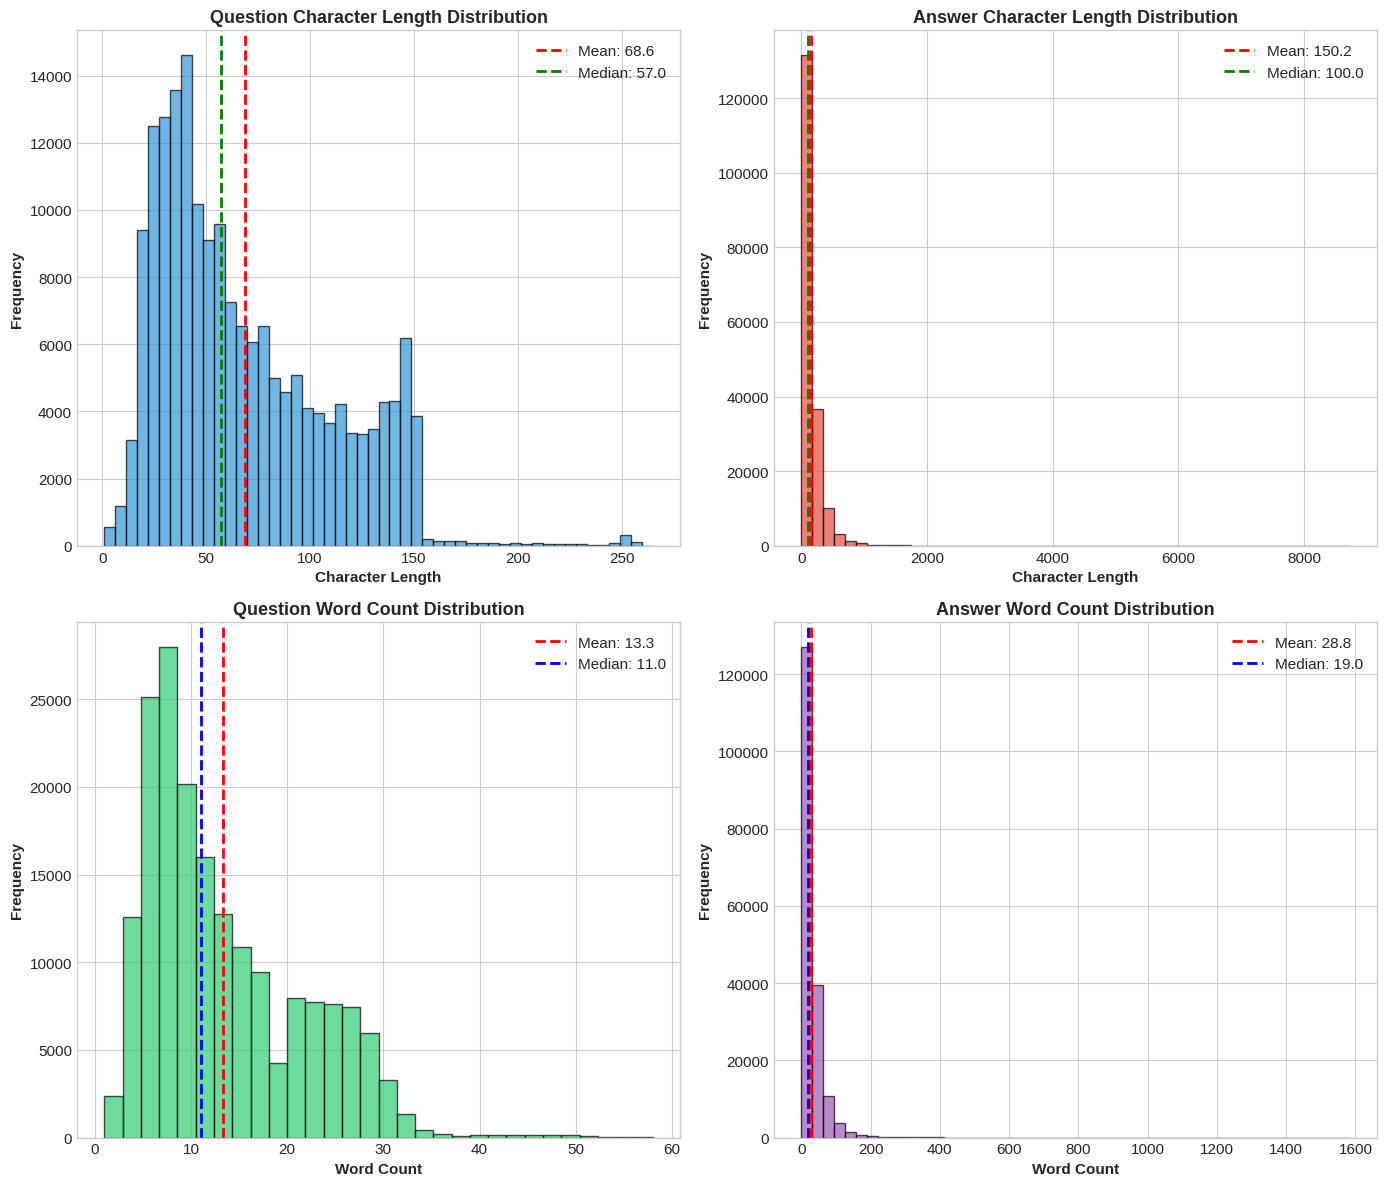

In [27]:
# Text Length Distributions Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Question Character Length Distribution
ax1 = axes[0, 0]
ax1.hist(df['question_char_len'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
ax1.axvline(df['question_char_len'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["question_char_len"].mean():.1f}')
ax1.axvline(df['question_char_len'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["question_char_len"].median():.1f}')
ax1.set_xlabel('Character Length', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title('Question Character Length Distribution', fontsize=13, fontweight='bold')
ax1.legend()

# 2. Answer Character Length Distribution
ax2 = axes[0, 1]
ax2.hist(df['answer_char_len'], bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
ax2.axvline(df['answer_char_len'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["answer_char_len"].mean():.1f}')
ax2.axvline(df['answer_char_len'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["answer_char_len"].median():.1f}')
ax2.set_xlabel('Character Length', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax2.set_title('Answer Character Length Distribution', fontsize=13, fontweight='bold')
ax2.legend()

# 3. Question Word Count Distribution
ax3 = axes[1, 0]
ax3.hist(df['question_word_count'], bins=30, color='#2ecc71', edgecolor='black', alpha=0.7)
ax3.axvline(df['question_word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["question_word_count"].mean():.1f}')
ax3.axvline(df['question_word_count'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df["question_word_count"].median():.1f}')
ax3.set_xlabel('Word Count', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax3.set_title('Question Word Count Distribution', fontsize=13, fontweight='bold')
ax3.legend()

# 4. Answer Word Count Distribution
ax4 = axes[1, 1]
ax4.hist(df['answer_word_count'], bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
ax4.axvline(df['answer_word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["answer_word_count"].mean():.1f}')
ax4.axvline(df['answer_word_count'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df["answer_word_count"].median():.1f}')
ax4.set_xlabel('Word Count', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Answer Word Count Distribution', fontsize=13, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.savefig('../visualizations/eda/text_length_distributions.png', dpi=150, bbox_inches='tight')
, dpi=150, bbox_inches='tight')
plt.show()


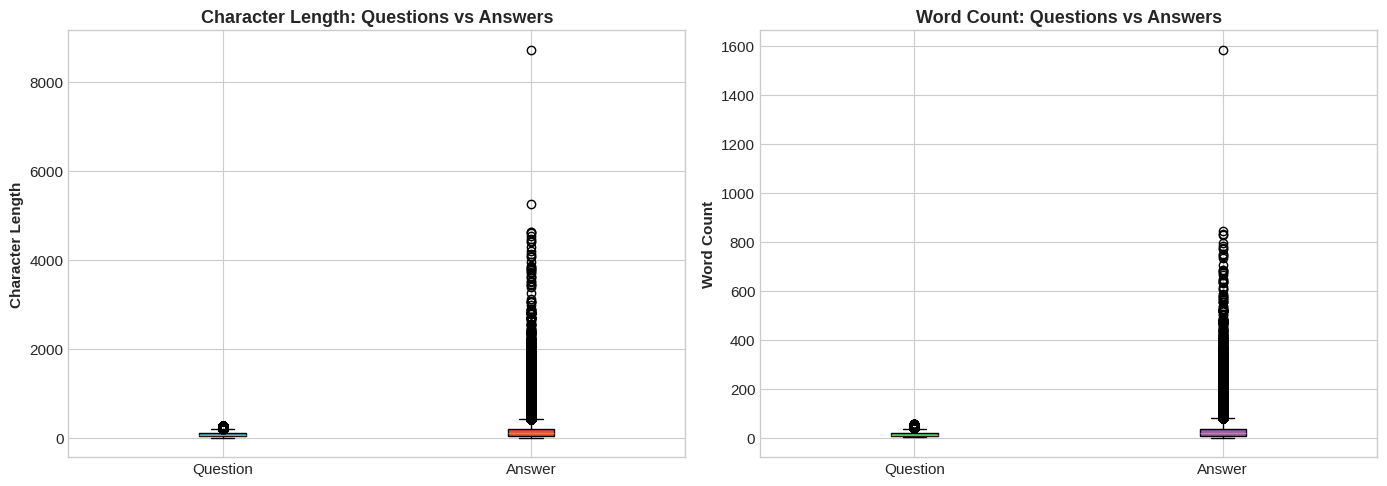

In [28]:
# Box plots comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character Length Box Plot
ax1 = axes[0]
data_char = [df['question_char_len'], df['answer_char_len']]
bp1 = ax1.boxplot(data_char, labels=['Question', 'Answer'], patch_artist=True)
bp1['boxes'][0].set_facecolor('#3498db')
bp1['boxes'][1].set_facecolor('#e74c3c')
ax1.set_ylabel('Character Length', fontsize=11, fontweight='bold')
ax1.set_title('Character Length: Questions vs Answers', fontsize=13, fontweight='bold')

# Word Count Box Plot
ax2 = axes[1]
data_word = [df['question_word_count'], df['answer_word_count']]
bp2 = ax2.boxplot(data_word, labels=['Question', 'Answer'], patch_artist=True)
bp2['boxes'][0].set_facecolor('#2ecc71')
bp2['boxes'][1].set_facecolor('#9b59b6')
ax2.set_ylabel('Word Count', fontsize=11, fontweight='bold')
ax2.set_title('Word Count: Questions vs Answers', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/eda/text_length_boxplots.png', dpi=150, bbox_inches='tight')
, dpi=150, bbox_inches='tight')
plt.show()


In [29]:
# Text length by question type
print("\nTEXT LENGTH BY QUESTION TYPE")
print("="*60)

length_by_type = df.groupby('questionType').agg({
    'question_char_len': ['mean', 'median', 'std'],
    'question_word_count': ['mean', 'median', 'std'],
    'answer_char_len': ['mean', 'median', 'std'],
    'answer_word_count': ['mean', 'median', 'std']
}).round(2)

print(length_by_type)



TEXT LENGTH BY QUESTION TYPE
             question_char_len               question_word_count               \
                          mean median    std                mean median   std   
questionType                                                                    
open-ended               72.51   63.0  43.18               14.12   12.0  8.39   
yes/no                   63.10   50.0  39.51               12.20   10.0  7.56   

             answer_char_len                answer_word_count                
                        mean median     std              mean median    std  
questionType                                                                 
open-ended            157.99  105.0  192.87             30.25   20.0  35.83  
yes/no                139.23   94.0  167.32             26.74   18.0  30.88  


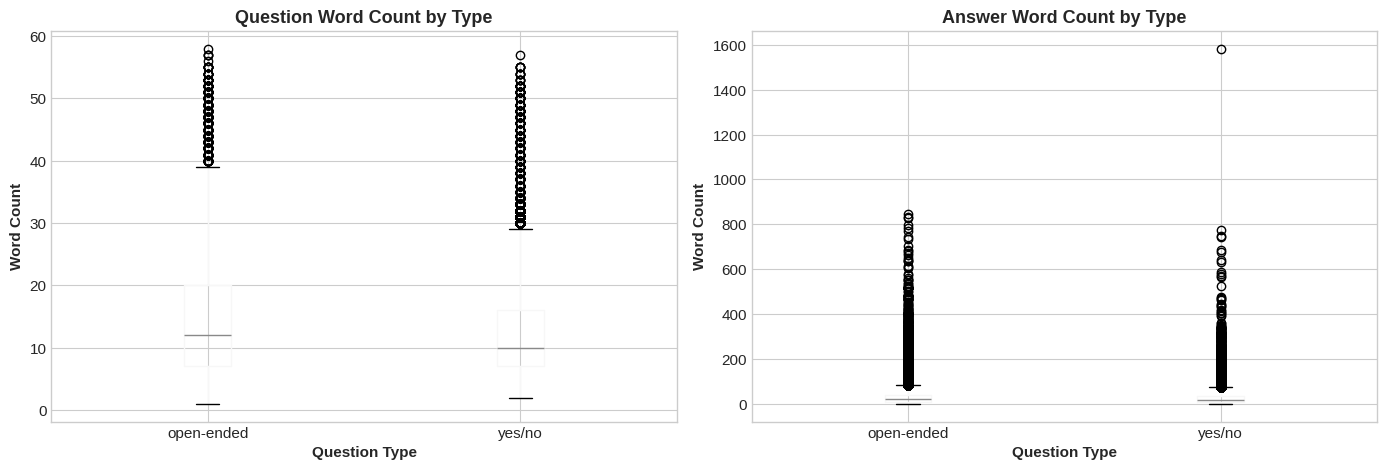

In [30]:
# Visualization: Text length by question type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Question word count by type
ax1 = axes[0]
df.boxplot(column='question_word_count', by='questionType', ax=ax1)
ax1.set_xlabel('Question Type', fontsize=11, fontweight='bold')
ax1.set_ylabel('Word Count', fontsize=11, fontweight='bold')
ax1.set_title('Question Word Count by Type', fontsize=13, fontweight='bold')
plt.suptitle('')  # Remove default title

# Answer word count by type
ax2 = axes[1]
df.boxplot(column='answer_word_count', by='questionType', ax=ax2)
ax2.set_xlabel('Question Type', fontsize=11, fontweight='bold')
ax2.set_ylabel('Word Count', fontsize=11, fontweight='bold')
ax2.set_title('Answer Word Count by Type', fontsize=13, fontweight='bold')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.savefig('../visualizations/eda/text_length_by_type.png', dpi=150, bbox_inches='tight')
, dpi=150, bbox_inches='tight')
plt.show()


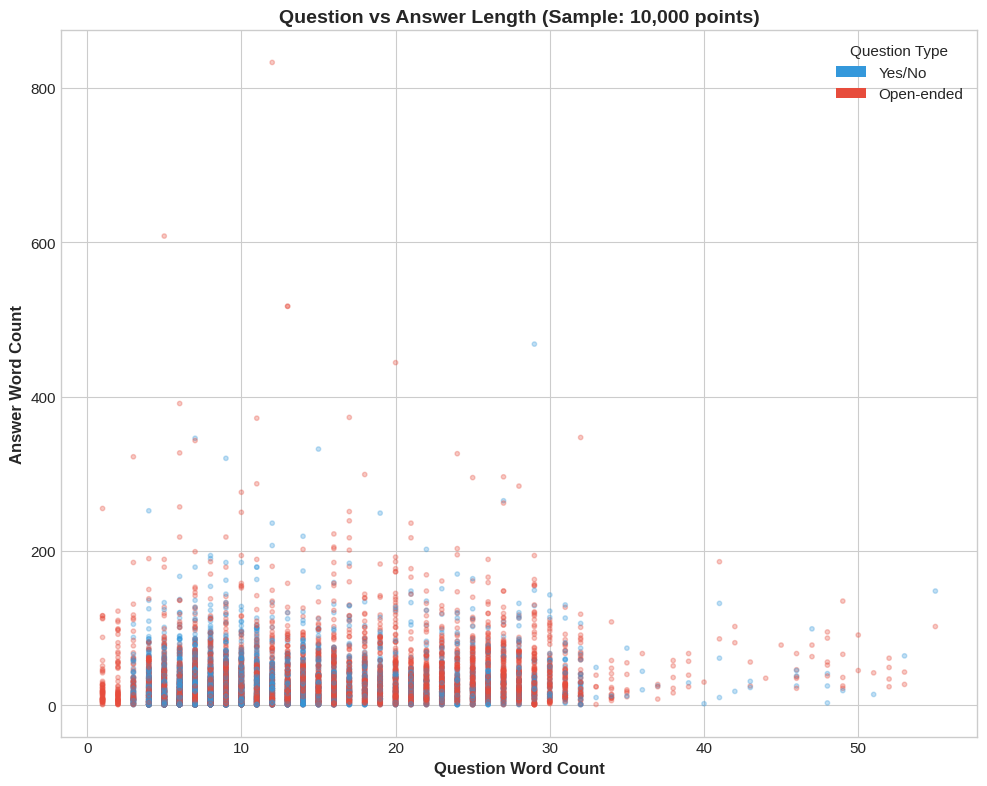


Correlation between question and answer length: 0.1554


In [31]:
# Scatter plot: Question vs Answer Length
fig, ax = plt.subplots(figsize=(10, 8))

# Sample for better visualization (if dataset is large)
sample_size = min(10000, len(df))
sample_df = df.sample(n=sample_size, random_state=42)

colors = sample_df['questionType'].map({'yes/no': '#3498db', 'open-ended': '#e74c3c'})

ax.scatter(sample_df['question_word_count'], sample_df['answer_word_count'], 
           c=colors, alpha=0.3, s=10)
ax.set_xlabel('Question Word Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Answer Word Count', fontsize=12, fontweight='bold')
ax.set_title(f'Question vs Answer Length (Sample: {sample_size:,} points)', fontsize=14, fontweight='bold')

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498db', label='Yes/No'),
                   Patch(facecolor='#e74c3c', label='Open-ended')]
ax.legend(handles=legend_elements, title='Question Type')

plt.tight_layout()
plt.savefig('../visualizations/eda/question_vs_answer_length.png', dpi=150, bbox_inches='tight')
, dpi=150, bbox_inches='tight')
plt.show()

# Correlation
corr = df['question_word_count'].corr(df['answer_word_count'])
print(f"\nCorrelation between question and answer length: {corr:.4f}")


---
## 6. Temporal Analysis


In [32]:
# Convert unix time to datetime
print("\nTEMPORAL ANALYSIS")
print("="*60)

df['datetime'] = pd.to_datetime(df['unixTime'], unit='s')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()

print(f"Date Range: {df['datetime'].min().strftime('%Y-%m-%d')} to {df['datetime'].max().strftime('%Y-%m-%d')}")
print(f"Time Span: {(df['datetime'].max() - df['datetime'].min()).days} days")



TEMPORAL ANALYSIS
Date Range: 2006-03-28 to 2015-05-02
Time Span: 3321 days


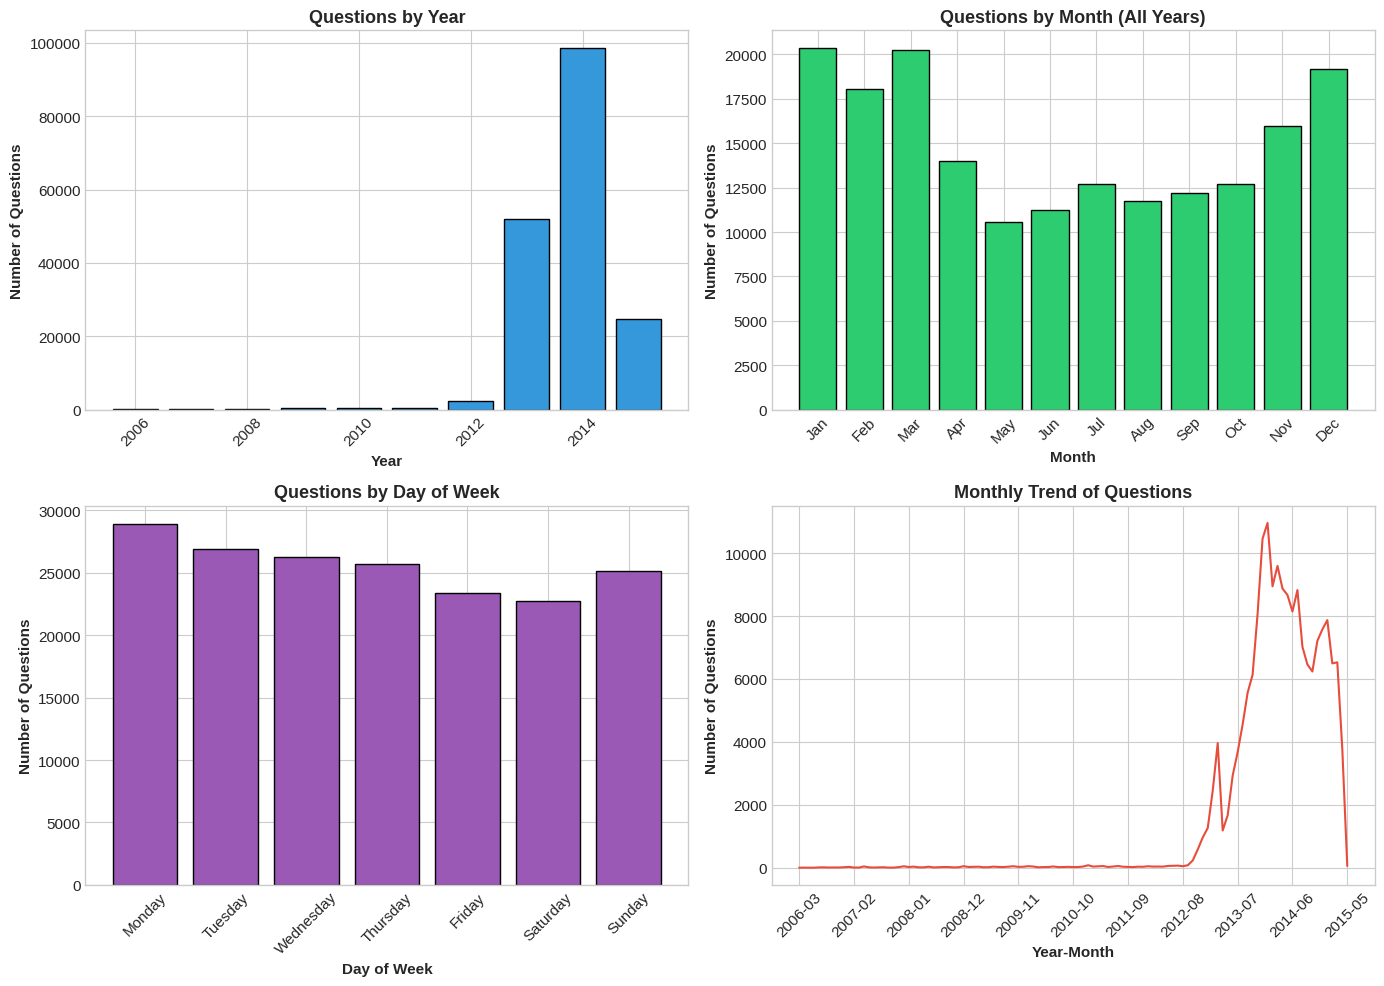

In [33]:
# Questions over time
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Questions by year
ax1 = axes[0, 0]
yearly_counts = df['year'].value_counts().sort_index()
ax1.bar(yearly_counts.index, yearly_counts.values, color='#3498db', edgecolor='black')
ax1.set_xlabel('Year', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Questions', fontsize=11, fontweight='bold')
ax1.set_title('Questions by Year', fontsize=13, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# 2. Questions by month
ax2 = axes[0, 1]
monthly_counts = df['month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Convert index to integers and filter out NaN/invalid values
valid_months = monthly_counts.dropna()
month_labels = []
month_values = []
for month_idx in valid_months.index:
    try:
        month_int = int(month_idx)
        if 1 <= month_int <= 12:
            month_labels.append(month_names[month_int - 1])
            month_values.append(valid_months[month_idx])
    except (ValueError, TypeError):
        continue
ax2.bar(month_labels, month_values, color='#2ecc71', edgecolor='black')
ax2.set_xlabel('Month', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Questions', fontsize=11, fontweight='bold')
ax2.set_title('Questions by Month (All Years)', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# 3. Questions by day of week
ax3 = axes[1, 0]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['day_of_week'].value_counts().reindex(day_order)
ax3.bar(dow_counts.index, dow_counts.values, color='#9b59b6', edgecolor='black')
ax3.set_xlabel('Day of Week', fontsize=11, fontweight='bold')
ax3.set_ylabel('Number of Questions', fontsize=11, fontweight='bold')
ax3.set_title('Questions by Day of Week', fontsize=13, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

# 4. Trend over time (monthly)
ax4 = axes[1, 1]
df['year_month'] = df['datetime'].dt.to_period('M')
monthly_trend = df.groupby('year_month').size()
ax4.plot(monthly_trend.index.astype(str), monthly_trend.values, color='#e74c3c', linewidth=1.5)
ax4.set_xlabel('Year-Month', fontsize=11, fontweight='bold')
ax4.set_ylabel('Number of Questions', fontsize=11, fontweight='bold')
ax4.set_title('Monthly Trend of Questions', fontsize=13, fontweight='bold')
# Show only every nth label to avoid overcrowding
n = max(len(monthly_trend) // 10, 1)
ax4.set_xticks(ax4.get_xticks()[::n])
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../visualizations/eda/temporal_analysis.png', dpi=150, bbox_inches='tight')
, dpi=150, bbox_inches='tight')
plt.show()


---
## 7. Sample Questions and Answers


In [34]:
# Sample Yes/No Questions
print("\nSAMPLE YES/NO QUESTIONS")
print("="*60)

yes_no_samples = df[df['questionType'] == 'yes/no'].sample(5, random_state=42)
for idx, row in yes_no_samples.iterrows():
    print(f"\n📦 ASIN: {row['asin']}")
    print(f"❓ Question: {row['question']}")
    print(f"✅ Answer ({row.get('answerType', 'N/A')}): {row['answer'][:200]}..." if len(row['answer']) > 200 else f"✅ Answer ({row.get('answerType', 'N/A')}): {row['answer']}")
    print("-" * 50)



SAMPLE YES/NO QUESTIONS

📦 ASIN: B007UV7WX0
❓ Question: The tabs that hold the rubber base on the bottom keep breaking - three so far. Do you replace them?
✅ Answer (?): Not sure what tabs are that are breaking....I have not had any problems. Please explain what the tabs look like. Maybe I am missing something?
--------------------------------------------------

📦 ASIN: B001BNNDQI
❓ Question: is there a burner on this model?
✅ Answer (?): No. The carafe jeep it hot.
--------------------------------------------------

📦 ASIN: B00DMBYM94
❓ Question: Is this rack stackable?
✅ Answer (N): No, its not intended to be, and I don't see any way to set it up. AT the top tier of the unit, the sides do not even reach as high as a soup can, so if you tried attaching another rack to the top , yo...
--------------------------------------------------

📦 ASIN: B0045YMQ36
❓ Question: I too trust America's Test Kitchen...is this the same egg topper that they recommend? Thank you.
✅ Answer (Y): Yes it is

In [35]:
# Sample Open-ended Questions
print("\nSAMPLE OPEN-ENDED QUESTIONS")
print("="*60)

open_samples = df[df['questionType'] == 'open-ended'].sample(5, random_state=42)
for idx, row in open_samples.iterrows():
    print(f"\n📦 ASIN: {row['asin']}")
    print(f"❓ Question: {row['question']}")
    print(f"💬 Answer: {row['answer'][:200]}..." if len(row['answer']) > 200 else f"💬 Answer: {row['answer']}")
    print("-" * 50)



SAMPLE OPEN-ENDED QUESTIONS

📦 ASIN: B00A7GNZZ4
❓ Question: we arose this morning and the coffee pot never brewed the coffee, what can be wrong what can we check? It was plugged in and coffee and water were in the device.! Please help.
💬 Answer: /Un plug let it sit for 1/2 hour replug reprograme see if that helps
--------------------------------------------------

📦 ASIN: B00009WE45
❓ Question: What is the degree of accuracy on this thermometer? (+/- "x" degrees)
💬 Answer: I used his for work. I used in a kitchen. Its great the degree is accurate. We compare to the actual thermometer we used at work. If anything its better then and old thermometer. And its waterproof. W...
--------------------------------------------------

📦 ASIN: B00IHRMUEC
❓ Question: What is the estimated shipping time?
💬 Answer: I ship usually 24 hours as long as I receive your personalization request. The estimated delivery time is usually 3-5 business days using first class shipping
----------------------------

In [36]:
# Shortest and Longest Questions
print("\nEXTREME EXAMPLES")
print("="*60)

# Shortest question
shortest_q = df.loc[df['question_word_count'].idxmin()]
print(f"\n🔹 SHORTEST QUESTION ({shortest_q['question_word_count']} words):")
print(f"   Q: {shortest_q['question']}")
print(f"   A: {shortest_q['answer'][:150]}..." if len(shortest_q['answer']) > 150 else f"   A: {shortest_q['answer']}")

# Longest question
longest_q = df.loc[df['question_word_count'].idxmax()]
print(f"\n🔹 LONGEST QUESTION ({longest_q['question_word_count']} words):")
print(f"   Q: {longest_q['question'][:300]}..." if len(longest_q['question']) > 300 else f"   Q: {longest_q['question']}")

# Shortest answer
shortest_a = df.loc[df['answer_word_count'].idxmin()]
print(f"\n🔹 SHORTEST ANSWER ({shortest_a['answer_word_count']} words):")
print(f"   Q: {shortest_a['question']}")
print(f"   A: {shortest_a['answer']}")

# Longest answer
longest_a = df.loc[df['answer_word_count'].idxmax()]
print(f"\n🔹 LONGEST ANSWER ({longest_a['answer_word_count']} words):")
print(f"   Q: {longest_a['question']}")
print(f"   A: {longest_a['answer'][:300]}...")



EXTREME EXAMPLES

🔹 SHORTEST QUESTION (1 words):
   Q: dal
   A: Dal (also spelled dahl or daal) or 'thuvaram paruppu' in Tamil or Pappu in Telugu is a preparation of pulses (dried lentils, peas or beans) which have...

🔹 LONGEST QUESTION (58 words):
   Q: I purchased Comfort Furnace Gold Feb 2014 and only used it 6 times and when I went to use it yesterday , I put in temp and rime for 2 hrs and the heater stays on for 15 minutes and shuts off I have let 3 msg with the # in book and no one has called me...

🔹 SHORTEST ANSWER (0 words):
   Q: Where is each piece made?
   A: 

🔹 LONGEST ANSWER (1583 words):
   Q: Can't decide between the VitaClay 2 in 1 rice/slow cooker or the Multi-cooker. Anyone have a preference?
   A: If you have not been following some comments in the 1 star category you may want to. Basically VitaClay admits to manufacturing troubles and how they are working on a solution to the problem of breakage, and their complete lack of customer support until, it seems, a pe

---
## 8. Summary Statistics


In [37]:
# Final Summary
print("\n" + "="*70)
print("                    EDA SUMMARY - HOME AND KITCHEN")
print("="*70)

print(f"""
📊 DATASET OVERVIEW
─────────────────────────────────────────────────────────────────────
Total Questions:          {len(df):>12,}
Unique Products (ASINs):  {df['asin'].nunique():>12,}
Date Range:               {df['datetime'].min().strftime('%Y-%m-%d')} to {df['datetime'].max().strftime('%Y-%m-%d')}

📋 QUESTION TYPE DISTRIBUTION
─────────────────────────────────────────────────────────────────────
Yes/No Questions:         {(df['questionType'] == 'yes/no').sum():>12,} ({(df['questionType'] == 'yes/no').sum()/len(df)*100:.1f}%)
Open-ended Questions:     {(df['questionType'] == 'open-ended').sum():>12,} ({(df['questionType'] == 'open-ended').sum()/len(df)*100:.1f}%)

📦 PRODUCT DISTRIBUTION
─────────────────────────────────────────────────────────────────────
Avg Questions/Product:    {len(df)/df['asin'].nunique():>12.2f}
Max Questions/Product:    {questions_per_asin.max():>12,}
Products with 1 Question: {(questions_per_asin == 1).sum():>12,} ({(questions_per_asin == 1).sum()/len(questions_per_asin)*100:.1f}%)

📝 TEXT LENGTH STATISTICS
─────────────────────────────────────────────────────────────────────
Question - Avg Words:     {df['question_word_count'].mean():>12.2f}
Question - Median Words:  {df['question_word_count'].median():>12.0f}
Answer - Avg Words:       {df['answer_word_count'].mean():>12.2f}
Answer - Median Words:    {df['answer_word_count'].median():>12.0f}
Answer/Question Ratio:    {df['answer_word_count'].mean()/df['question_word_count'].mean():>12.2f}x

""")

print("="*70)
print("                         END OF EDA REPORT")
print("="*70)



                    EDA SUMMARY - HOME AND KITCHEN

📊 DATASET OVERVIEW
─────────────────────────────────────────────────────────────────────
Total Questions:               184,439
Unique Products (ASINs):        24,501
Date Range:               2006-03-28 to 2015-05-02

📋 QUESTION TYPE DISTRIBUTION
─────────────────────────────────────────────────────────────────────
Yes/No Questions:               76,326 (41.4%)
Open-ended Questions:          108,113 (58.6%)

📦 PRODUCT DISTRIBUTION
─────────────────────────────────────────────────────────────────────
Avg Questions/Product:            7.53
Max Questions/Product:              20
Products with 1 Question:           31 (0.1%)

📝 TEXT LENGTH STATISTICS
─────────────────────────────────────────────────────────────────────
Question - Avg Words:            13.32
Question - Median Words:            11
Answer - Avg Words:              28.80
Answer - Median Words:              19
Answer/Question Ratio:            2.16x


                       

In [38]:
# Save processed dataframe for later use
df.to_pickle('../data/processed/processed_home_kitchen_qa.pkl')
print("\n✓ Processed dataframe saved to '../data/processed/processed_home_kitchen_qa.pkl'")
print(f"  File can be loaded with: df = pd.read_pickle('../data/processed/processed_home_kitchen_qa.pkl')")



✓ Processed dataframe saved to 'data/processed_home_kitchen_qa.pkl'
  File can be loaded with: df = pd.read_pickle('data/processed_home_kitchen_qa.pkl')
